##  Tham số Kmeans

### Input

- img_1d = ảnh (sau khi chuyển từ 2 chuyền -> 1 chiều)
- k_cluster = k màu
- max_iter = số vòng lặp tối đa (0 -> max_iter)
- init_cluster = kiểu tạo ra cái mảng `centroids` (random, in_pixels)
    * Random: [0, 0, 0] -> [255, 255, 255] (RGB) * k 
    * In_pixels: cũng là random nhưng lấy từ ảnh ban đầu
                 random k điểm ảnh trong img_1d

In [21]:
import numpy as np

img_2d = np.array([[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]])

print(img_2d.shape)

(5, 5, 3)


In [22]:
img_1d = np.ndarray((img_2d.shape[0] * img_2d.shape[1], img_2d.shape[2]), 'uint8', img_2d.astype('uint8'))
# arr.astype('uint8')

print(img_1d.shape)

(25, 3)


In [23]:
# init_cluster = random
k = 3
centroids = []

for _ in range(k):
    centroids.append([np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)])

centroids = np.array(centroids, dtype='uint8')

print(centroids)

[[119 221 253]
 [ 99 201  71]
 [ 29 216  10]]


In [24]:
# init_cluster = in_pixels
k = 3
centroids = []

for _ in range(k):
    centroids.append(img_1d[np.random.randint(0, img_1d.shape[0])])

centroids = np.array(centroids, dtype='uint8')

print(centroids)

[[255   0   0]
 [255 255 255]
 [255   0   0]]


### Output

- Kích thước của lables = kích thước của img_1d = dài x rộng
- Mảng đánh dấu

In [25]:
# [[255   0   0]
# [255 255 255]
# [255 255 255]]
print(img_1d)
# labels[0] = 1
# labels[1] = 0
# ...

[[255 255 255]
 [255   0   0]
 [255   0   0]
 [255   0   0]
 [255 255 255]
 [255 255 255]
 [255   0   0]
 [255 255 255]
 [255   0   0]
 [255 255 255]
 [255 255 255]
 [255   0   0]
 [255 255 255]
 [255   0   0]
 [255 255 255]
 [255 255 255]
 [255   0   0]
 [255 255 255]
 [255   0   0]
 [255 255 255]
 [255 255 255]
 [255   0   0]
 [255   0   0]
 [255   0   0]
 [255 255 255]]


## Đọc ảnh

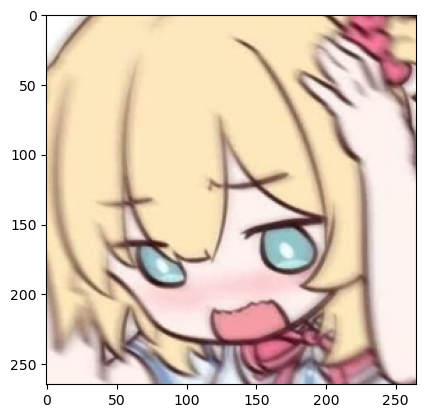

In [26]:
# Import PIL
from PIL import Image
# import plt
import matplotlib.pyplot as plt

img = Image.open('wibu.png')
plt.imshow(img)

## Chuyển sang 2 chiều

In [27]:
img_2d = np.array(img)

print(img_2d)

print(img_2d.shape)

[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [143 126 119 255]
  [148 130 124 255]
  [154 136 130 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [ 80  57  46 255]
  [ 71  48  37 255]
  [ 65  41  32 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [ 98  70  56 255]
  [ 90  62  48 255]
  [ 80  52  40 255]]

 ...

 [[254 243 239 255]
  [254 243 239 255]
  [254 243 239 255]
  ...
  [192 170 170 255]
  [180 160 159 255]
  [172 151 150 255]]

 [[254 243 239 255]
  [254 243 239 255]
  [254 243 239 255]
  ...
  [166 142 142 255]
  [151 129 128 255]
  [141 118 117 255]]

 [[254 243 239 255]
  [254 243 239 255]
  [254 243 239 255]
  ...
  [146 119 120 255]
  [137 112 112 255]
  [143 120 121 255]]]
(265, 265, 4)


## Chuyển sang 1 chiều:

In [28]:
img_1d = np.ndarray((img_2d.shape[0] * img_2d.shape[1], img_2d.shape[2]), 'uint8', img_2d.astype('uint8'))

display(img_1d)

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [146, 119, 120, 255],
       [137, 112, 112, 255],
       [143, 120, 121, 255]], dtype=uint8)

## K-Means

### Hàm hỗ trợ:

- Tính khoảng cách giữa 2 điểm

In [29]:
# Do thằng quỷ này chứ không ai hết
def CalcDistance(color1, color2):
    return np.sqrt(np.sum((color1.astype('int64') - color2.astype('int64')) ** 2))

In [30]:
print(CalcDistance(np.array([0, 0, 0]).astype('uint8'), np.array([255, 0, 0]).astype('uint8')))
# [3, 3, 3] ^ 2
# [9, 9, 9]
# sum = 27
# sqrt(27) = 5.196152422706632

255.0


- Khởi tạo lables

In [31]:
labels = np.zeros((img_1d.shape[0] * img_1d.shape[1], ), dtype='uint8')

print(labels.shape[0])
print(img_1d.shape[1] * img_1d.shape[0])

280900
280900


### Hàm chính:

In [32]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    # init_cluster = random
    centroids = []

    for _ in range(k_clusters):
        centroids.append(img_1d[np.random.randint(0, img_1d.shape[0])])

    centroids = np.ndarray((k_clusters, img_1d.shape[1]), 'uint8', np.array(centroids))
    labels = np.ndarray((img_1d.shape[0], ), 'int32', np.zeros((img_1d.shape[0], ), dtype='int32'))
    # Tất cả các điểm đều thuộc cluster 0
    # labels[i] là vị trí của màu (trong centroids) gần với i nhất

    for i in range(img_1d.shape[0]):
        for j in range(centroids.shape[0]):
            if (CalcDistance(img_1d[i], centroids[j]) < CalcDistance(img_1d[i], centroids[labels[i]])):
                labels[i] = j

    # Centroid các màu random, labels (đúng)
    # Xử lí
    for _ in range(max_iter):

        # Tính lại centroids mới
        for i in range(k_clusters):
            c = np.ndarray((img_1d.shape[1], ), 'int32', np.zeros((img_1d.shape[1], ), dtype='int32'))
            count = 0

            for j in range(img_1d.shape[0]):
                if (labels[j] == i):
                    c += img_1d[j] # c = c + img_1d[j]
                    count += 1      

            if (count != 0):
                centroids[i] = (c / count).astype('uint8')

        # Tính lại labels
        for i in range(img_1d.shape[0]):
            for j in range(centroids.shape[0]):
                if (CalcDistance(img_1d[i], centroids[j]) < CalcDistance(img_1d[i], centroids[labels[i]])):
                    labels[i] = j


    return centroids, labels

centroids, labels = kmeans(img_1d, 10, 1, 'random')

array([0, 1, 2, 3, 6, 8, 9])

array([[252, 241, 238, 255],
       [252, 241, 238, 255],
       [252, 241, 238, 255],
       ...,
       [175, 144, 134, 255],
       [175, 144, 134, 255],
       [175, 144, 134, 255]], dtype=uint8)

(265, 265, 4)


array([[[252, 241, 238, 255],
        [252, 241, 238, 255],
        [252, 241, 238, 255],
        ...,
        [175, 144, 134, 255],
        [175, 144, 134, 255],
        [175, 144, 134, 255]],

       [[252, 241, 238, 255],
        [252, 241, 238, 255],
        [252, 241, 238, 255],
        ...,
        [175, 144, 134, 255],
        [175, 144, 134, 255],
        [175, 144, 134, 255]],

       [[252, 241, 238, 255],
        [252, 241, 238, 255],
        [252, 241, 238, 255],
        ...,
        [175, 144, 134, 255],
        [175, 144, 134, 255],
        [175, 144, 134, 255]],

       ...,

       [[252, 241, 238, 255],
        [252, 241, 238, 255],
        [252, 241, 238, 255],
        ...,
        [175, 144, 134, 255],
        [175, 144, 134, 255],
        [175, 144, 134, 255]],

       [[252, 241, 238, 255],
        [252, 241, 238, 255],
        [252, 241, 238, 255],
        ...,
        [175, 144, 134, 255],
        [175, 144, 134, 255],
        [175, 144, 134, 255]],

       [[252

(265, 265, 4)


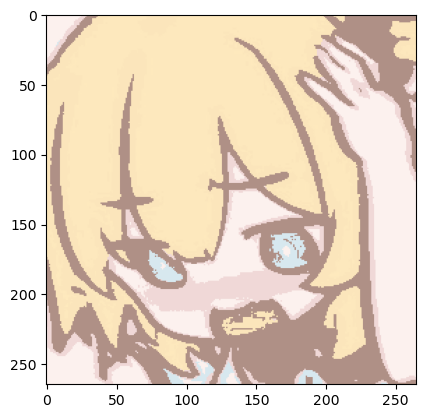

In [33]:
# centroids gồm k màu
# labels có kích thước = img_1d.shape[0]

display(np.unique(labels))

new_img_1d = np.ndarray((labels.shape[0], centroids.shape[1]), 'uint8', np.array([centroids[l] for l in labels]))

new_img_1d = np.array(new_img_1d)
new_img_1d = np.ndarray((img_1d.shape[0], img_1d.shape[1]), 'uint8', new_img_1d)
new_img_2d = np.reshape(new_img_1d, (img_2d.shape[0], img_2d.shape[1], img_2d.shape[2]))

plt.imshow(new_img_2d)